In [1]:
import pandas as pd
import os

# Define the base directory where your data is stored.
base_dir = r"C:\Users\Hemanth G\Documents\Data\Data"

# Construct the full file path to the patients.csv file.
patients_csv_path = os.path.join(base_dir, "patients.csv")

# Load the patients.csv file into a DataFrame.
patient_df = pd.read_csv(patients_csv_path)

# Display the first five rows of the DataFrame.
print("Patient Data (first 5 rows):")
print(patient_df.head())


Patient Data (first 5 rows):
   patient affected  MAL amount
0       13    right        5.03
1       14     left        0.83
2       15    right        5.00
3       16     left        2.40
4       17     left        4.30


In [2]:
import pandas as pd
import numpy as np
import os

# Define the base directory (update to your Data location)
base_dir = r"C:\Users\Hemanth G\Documents\Data\Data"

# Initialize an empty list to store M2 values for each patient
M2_affected = []

# Iterate through each record in patient_df
for idx, row in patient_df.iterrows():
    patient_id = row['patient']      # e.g., 13, 14, 15...
    affected_side = row['affected']    # "left" or "right"
    
    print(f"Processing patient #{patient_id} (affected: {affected_side})")
    
    # Build the file path. Files are stored in a folder named with the patient id
    # and are named "LOG_Left.csv" or "LOG_Right.csv" (note: affected_side is capitalized)
    patient_folder = os.path.join(base_dir, str(patient_id))
    file_name = f"LOG_{affected_side.capitalize()}.csv"
    file_path = os.path.join(patient_folder, file_name)
    
    try:
        # Read the CSV file.
        # We use skiprows=7 since the raw accelerometer data is assumed to start at row 8.
        data = pd.read_csv(file_path, skiprows=7)
        
        # Extract accelerometer columns (assuming columns 0, 1, and 2 are x, y, and z data)
        acc_x = data.iloc[:, 0].astype(float)
        acc_y = data.iloc[:, 1].astype(float)
        acc_z = data.iloc[:, 2].astype(float)
        
        # Compute the acceleration magnitude per row using the formula:
        # |a| = sqrt( a_x^2 + a_y^2 + a_z^2 - 9.8 )
        # We use np.maximum(0, ...) to ensure that we don't try to compute the square root of a negative number.
        magnitudes = np.sqrt(np.maximum(0, acc_x**2 + acc_y**2 + acc_z**2 - 9.8))
        
        # Compute M2 as the mean of these magnitudes (i.e., sum / number of rows)
        m2_value = magnitudes.mean()
        M2_affected.append(m2_value)
    except Exception as e:
        print(f"Error processing patient {patient_id}: {e}")
        # In case of an error, record a default value (for instance, 0)
        M2_affected.append(0)

# Print the computed M2 values for all patients
print("Computed M2 values for affected arms:")
print(M2_affected)


Processing patient #13 (affected: right)
Processing patient #14 (affected: left)
Processing patient #15 (affected: right)
Processing patient #16 (affected: left)
Processing patient #17 (affected: left)
Processing patient #18 (affected: right)
Processing patient #21 (affected: left)
Processing patient #22 (affected: right)
Processing patient #23 (affected: left)
Processing patient #24 (affected: left)
Processing patient #25 (affected: left)
Processing patient #26 (affected: left)
Processing patient #33 (affected: left)
Computed M2 values for affected arms:
[10.470408710610222, 9.54348290980514, 49.95477664710607, 10.47934244622377, 12.644769443588615, 10.528093766693631, 9.948381607914683, 12.379077142031718, 29.609054157748513, 9.747672796217605, 11.13338260681443, 38.91924240711721, 10.246313879849833]


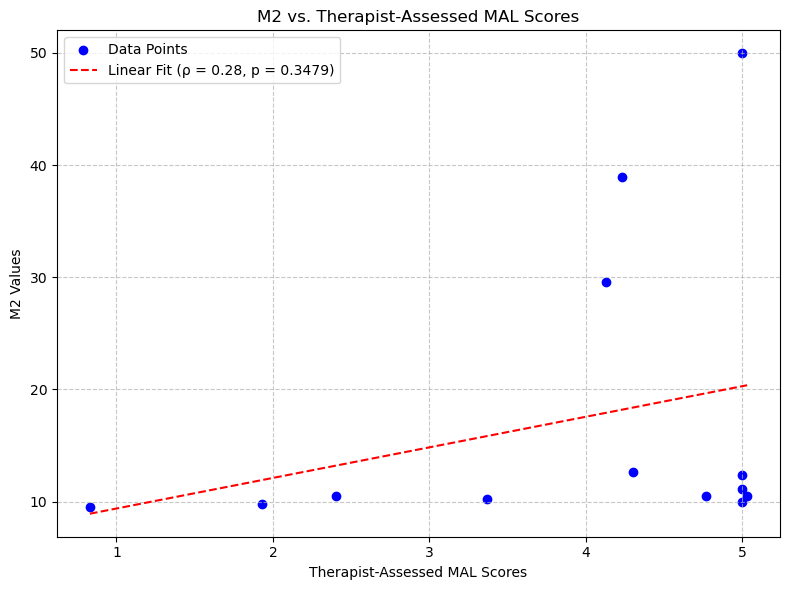

Correlation coefficient (ρ): 0.28
p-value: 0.3479


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Extract MAL scores from the patient_df DataFrame.
MAL_scores = patient_df['MAL amount'].values

# Create the scatter plot.
plt.figure(figsize=(8, 6))
plt.scatter(MAL_scores, M2_affected, marker='o', color='blue', label='Data Points')
plt.xlabel('Therapist-Assessed MAL Scores')
plt.ylabel('M2 Values')
plt.title('M2 vs. Therapist-Assessed MAL Scores')

# Perform linear regression on MAL scores vs M2 values.
slope, intercept, r_value, p_value, std_err = stats.linregress(MAL_scores, M2_affected)

# Generate x-values for the fitted line (using min and max of MAL scores).
x_line = np.linspace(min(MAL_scores), max(MAL_scores), 100)
y_line = slope * x_line + intercept

# Plot the linear regression fit.
plt.plot(x_line, y_line, 'r--', label=f'Linear Fit (ρ = {r_value:.2f}, p = {p_value:.4f})')

# Display legend and grid.
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the regression statistics.
print(f"Correlation coefficient (ρ): {r_value:.2f}")
print(f"p-value: {p_value:.4f}")
